In [1]:
import os
os.chdir('D:\\Mohankumar files\\REGEX Project 1')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.shape

(303, 14)

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
duplicate=heart.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
heart[duplicate]

No Of Duplicate Variables: 1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [16]:
heart.drop_duplicates(inplace = True)

In [17]:
duplicate=heart.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
heart[duplicate]

No Of Duplicate Variables: 0


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


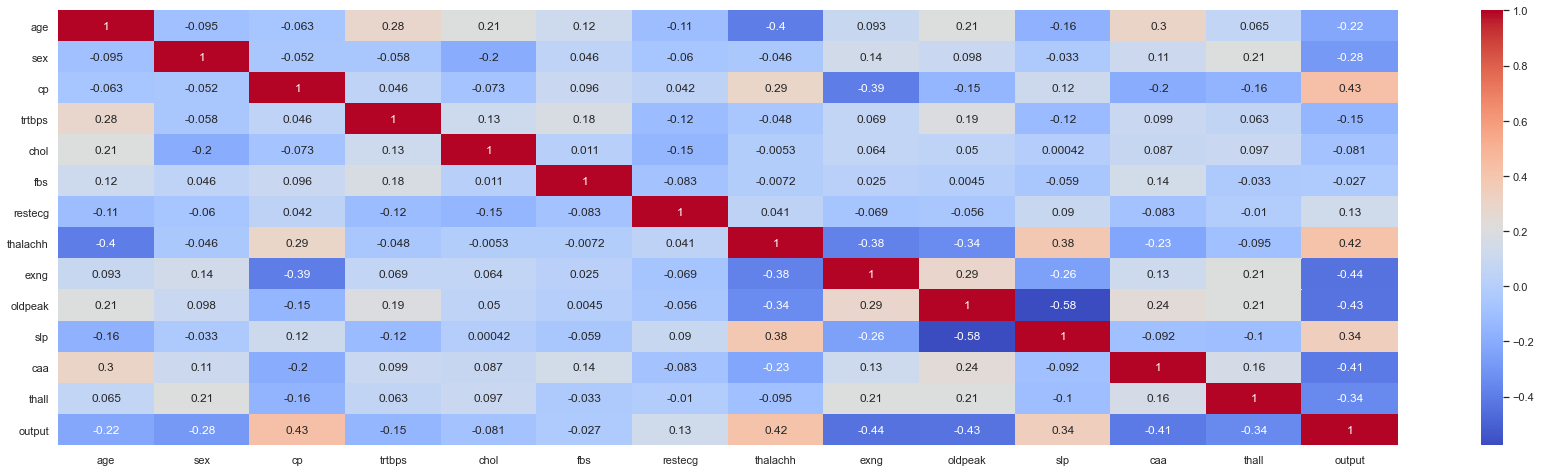

In [20]:
plt.figure(figsize=(30,8))
sns.heatmap(heart.corr(), cmap='coolwarm', annot=True)
plt.show()

# Split the data into Independent Variable  and Dependent variable

In [21]:
x = heart.iloc[:,0:13].values
heart.head()
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [25]:
y = heart.iloc[:,13].values
heart.head()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Spliting the data into training and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=101)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 13)
(76, 13)
(226,)
(76,)


In [35]:
#Building Logistic Regression with training dataset
from sklearn.linear_model import LogisticRegression

In [36]:
#fit the model to the training dataset
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\DELL INSPIRON 15R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
print(model.intercept_)
print(model.coef_)

[0.06102726]
[[ 0.00568988 -1.04022265  0.82995681 -0.0038617  -0.00117741  0.15053618
   0.45516515  0.01953603 -0.72467744 -0.61747876  0.38289322 -0.60375271
  -0.80379679]]


In [43]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics


In [44]:
log_model_SL = LogisticRegression()  
log_model_SL.fit(x_train, y_train)

log_model_pr = log_model_SL.predict(x_test) 
log_test_accuracy=metrics.accuracy_score(y_test,log_model_pr)
log_training_accuracy=log_model_SL.score(x_train, y_train)


print("Test Accuracy for log_model_SL:\t",log_test_accuracy)
print()
print("Training Accuracy for log_model_SL:\t",log_training_accuracy)

Test Accuracy for log_model_SL:	 0.8552631578947368

Training Accuracy for log_model_SL:	 0.8495575221238938


C:\Users\DELL INSPIRON 15R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
 ##Decision Tree model

tree_model_SL = DecisionTreeClassifier()  
tree_model_SL.fit(x_train, y_train)

tree_model_pr = tree_model_SL.predict(x_test) 
tree_model_test_accuracy=metrics.accuracy_score(y_test,tree_model_pr)
tree_model_training_accuracy=tree_model_SL.score(x_train, y_train)
tree_model_precesion = metrics.precision_score(y_test,tree_model_pr)


print("Test Accuracy for tree_model_SL:\n",tree_model_test_accuracy)
print()
print("Training Accuracy for tree_model_SL:\n",tree_model_training_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,tree_model_pr))
print()
print("\nPrecision Score:\n\n",tree_model_precesion)

Test Accuracy for tree_model_SL:
 0.7368421052631579

Training Accuracy for tree_model_SL:
 1.0

Confusion Matirx:

 [[23 13]
 [ 7 33]]


Precision Score:

 0.717391304347826


In [47]:
# Random Forest model
random_model_SL = RandomForestClassifier()  
random_model_SL.fit(x_train, y_train)

random_SL_pr = random_model_SL.predict(x_test) 
random_model_SL_test_accuracy=metrics.accuracy_score(y_test,random_SL_pr)
random_model_SL_training_accuracy=random_model_SL.score(x_train, y_train)
random_model_SL_precesion = metrics.precision_score(y_test,random_SL_pr)

print("Test Accuracy for random_model_SL:\n",random_model_SL_test_accuracy)
print()
print("Training Accuracy for random_model_SL:\n",random_model_SL_training_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,random_SL_pr))
print()
print("\nPrecision Score:\n\n",random_model_SL_precesion)

Test Accuracy for random_model_SL:
 0.8421052631578947

Training Accuracy for random_model_SL:
 1.0

Confusion Matirx:

 [[26 10]
 [ 2 38]]


Precision Score:

 0.7916666666666666


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
prediction=rf_classifier.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[24 12]
 [ 7 33]]
0.75
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        36
           1       0.73      0.82      0.78        40

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



In [50]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,
                             criterion='entropy',
                             max_features='sqrt',
                             min_samples_leaf=10,
            random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[27  9]
 [ 2 38]]
0.8552631578947368
              precision    recall  f1-score   support

           0       0.93      0.75      0.83        36
           1       0.81      0.95      0.87        40

    accuracy                           0.86        76
   macro avg       0.87      0.85      0.85        76
weighted avg       0.87      0.86      0.85        76



In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in 
        np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [52]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,n_iter=100,
                               cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [54]:
rf_randomcv.best_params_
rf_randomcv
rf_randomcv.best_estimator_
best_random_grid=rf_randomcv.best_estimator_

In [56]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[27  9]
 [ 3 37]]
Accuracy Score 0.8421052631578947
Classification report:               precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.93      0.86        40

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



# Decision Tree model : 0.717391304347826
## Random Forest model : 7916666666666666
## confusion_matrix : 0.75
### Manual Hyperparameter Tuning : 0.8552631578947368
## accuracy_score :0.8421052631578947

# Best Model is : Manual Hyperparameter Tuning 

# Thank you